In [100]:
import tensorflow as tf
from tensorflow.keras import models, layers
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [81]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(r"D:\Images", image_size = (224,224), batch_size = 40, label_mode = "int", shuffle = True)

Found 200 files belonging to 2 classes.


In [82]:
class_names = dataset.class_names
class_names

['alligator', 'shark']

In [83]:
len(dataset)

5

In [84]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(40, 224, 224, 3)
[1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1
 0 0 1]


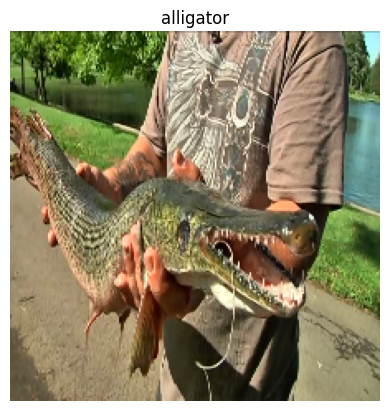

In [85]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[1].numpy().astype("uint8"))
    plt.title(class_names[label_batch[1]])
    plt.axis("off")

In [141]:
train_ds = dataset.take(4)
test_ds = dataset.skip(4)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(224,224),
    layers.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [151]:
model_VGG_Block_1 = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(64, (3,3), activation = "relu", padding = "same", input_shape = (40,224,224,3)),
    layers.Conv2D(64, (3,3), activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(64, activation= "relu"),
    layers.Dense(2, activation = "softmax")
])

model_VGG_Block_1.build(input_shape= (40,224,224,3))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [152]:
model_VGG_Block_1.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [153]:
model_VGG_Block_1.fit(
    train_ds,
    epochs = 10,
    verbose = 1,
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.5050 - loss: 6.8451
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.7225 - loss: 2.6281
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.8808 - loss: 0.4126
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9692 - loss: 0.2356
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.9658 - loss: 0.1620
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.9817 - loss: 0.0413
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.9750 - loss: 0.0418
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.9883 - loss: 0.0775
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 1.0000 - loss: 0.0056
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 1.0000 - loss: 0.0027 


In [154]:
model_VGG_Block_1.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_32 (Sequential)      │ (40, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (40, 224, 224, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (40, 224, 224, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (40, 112, 112, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (40, 802816)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (40, 64)               │    51,380,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (40, 2)                │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,257,416 (588.45 MB)

 Trainable params: 51,419,138 (196.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 102,838,278 (392.30 MB)

In [155]:
model_VGG_Block_1.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9750 - loss: 0.0618


[0.06180252879858017, 0.9750000238418579]

In [156]:
model_VGG_Block_3 = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(64, (3,3), activation = "relu", padding = "same", input_shape = (40,224,224,3)),
    layers.Conv2D(64, (3,3), activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(128, (3,3), activation = "relu", padding = "same", input_shape = (40,224,224,3)),
    layers.Conv2D(128, (3,3), activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(256, (3,3), activation = "relu", padding = "same", input_shape = (40,224,224,3)),
    layers.Conv2D(256, (3,3), activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(64, activation= "relu"),
    layers.Dense(2, activation = "softmax")
])

model_VGG_Block_3.build(input_shape=(40,224,224,3))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [157]:
model_VGG_Block_3.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [158]:
model_VGG_Block_3.fit(
    train_ds,
    epochs = 10,
    verbose = 1
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 44s 8s/step - accuracy: 0.5050 - loss: 2.2322
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 44s 12s/step - accuracy: 0.5208 - loss: 0.6813
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 8s/step - accuracy: 0.9567 - loss: 0.3454
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 8s/step - accuracy: 0.6892 - loss: 2.3204
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 9s/step - accuracy: 0.7783 - loss: 0.5525
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 8s/step - accuracy: 0.9000 - loss: 0.3618
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 8s/step - accuracy: 0.8817 - loss: 0.3461
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 9s/step - accuracy: 0.9175 - loss: 0.2087
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 44s 9s/step - accuracy: 0.9600 - loss: 0.1219
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 11s/step - accuracy: 0.9517 - loss: 0.1466


In [159]:
model_VGG_Block_3.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_32 (Sequential)      │ (40, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (40, 224, 224, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (40, 224, 224, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (40, 112, 112, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (40, 112, 112, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (40, 112, 112, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (40, 56, 56, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (40, 56, 56, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (40, 56, 56, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (40, 28, 28, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (40, 200704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (40, 64)               │    12,845,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (40, 2)                │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,971,976 (160.11 MB)

 Trainable params: 13,990,658 (53.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,981,318 (106.74 MB)

In [160]:
model_VGG_Block_3.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9250 - loss: 0.1903


[0.1903078407049179, 0.925000011920929]

In [161]:
model_VGG_Block_3_data_augmentation = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, (3,3), activation = "relu", padding = "same", input_shape = (40,224,224,3)),
    layers.Conv2D(64, (3,3), activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(128, (3,3), activation = "relu", padding = "same", input_shape = (40,224,224,3)),
    layers.Conv2D(128, (3,3), activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(256, (3,3), activation = "relu", padding = "same", input_shape = (40,224,224,3)),
    layers.Conv2D(256, (3,3), activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(64, activation= "relu"),
    layers.Dense(2, activation = "softmax")
])

model_VGG_Block_3_data_augmentation.build(input_shape = (40,224,224,3))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [162]:
model_VGG_Block_3_data_augmentation.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [166]:
model_VGG_Block_3_data_augmentation.fit(
    train_ds,
    epochs = 10,
    verbose = 1
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 7s/step - accuracy: 0.9592 - loss: 0.1302
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.9658 - loss: 0.1114
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 8s/step - accuracy: 0.9567 - loss: 0.0933
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 10s/step - accuracy: 0.9600 - loss: 0.0713
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 9s/step - accuracy: 0.9592 - loss: 0.1205
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 9s/step - accuracy: 0.9525 - loss: 0.0965
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 9s/step - accuracy: 0.9775 - loss: 0.0883
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 11s/step - accuracy: 0.9675 - loss: 0.0675
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 9s/step - accuracy: 0.9633 - loss: 0.0968
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 9s/step - accuracy: 0.9625 - loss: 0.0994


In [164]:
model_VGG_Block_3_data_augmentation.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_32 (Sequential)      │ (40, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_33 (Sequential)      │ (40, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (40, 224, 224, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (40, 224, 224, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (40, 112, 112, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (40, 112, 112, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (40, 112, 112, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (40, 56, 56, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (40, 56, 56, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (40, 56, 56, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (40, 28, 28, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (40, 200704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (40, 64)               │    12,845,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (40, 2)                │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,971,976 (160.11 MB)

 Trainable params: 13,990,658 (53.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,981,318 (106.74 MB)

In [165]:
model_VGG_Block_3_data_augmentation.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9250 - loss: 0.1679


[0.16786018013954163, 0.925000011920929]